In [135]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [136]:
file_path = '/Users/duynguyendinh/Downloads/coderun/python/MachineLearning/student_data.csv'
student_dataset = pd.read_csv(file_path)
student_dataset

,Student ID,Study Time,Midterm Score,Final Score
0,22528241,3.240093,6.774614,6.177122
1,22525183,3.294415,8.082871,1.382706
2,22527473,3.235071,9.373716,8.808850
3,22525881,3.161508,7.570550,5.585613
4,22525365,1.378614,8.575277,4.489938
...,...,...,...,...
495,22527628,4.669160,7.718984,7.726756
496,22525305,8.738401,8.565132,8.615231
497,22529191,6.045276,8.063777,9.636667
498,22523729,7.454052,7.873025,9.636571


In [137]:
name_columns = student_dataset.columns.values
name_columns

array(['Student ID', 'Study Time', 'Midterm Score', 'Final Score'],
      dtype=object)

In [138]:
# scaler = StandardScaler()
# student_dataset[name_columns[:-1]] = scaler.fit_transform(student_dataset[name_columns[:-1]])

In [139]:
X = student_dataset.drop(['Final Score', 'Student ID'], axis=1).values
y = student_dataset['Final Score'].values

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Text(0, 0.5, 'Final Score')

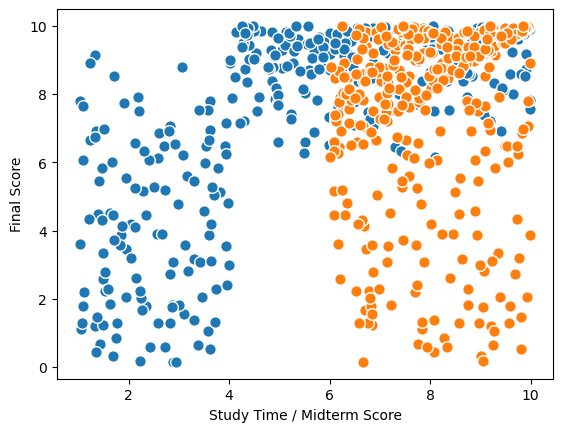

In [141]:
# Vẽ scatter plot
plt.scatter(X_train[:, 0], y_train, c='tab:blue', edgecolor='white', s=70, label='Study Time')
plt.scatter(X_train[:, 1], y_train, c='tab:orange', edgecolor='white', s=70, label='Midterm Score')

# Đặt tiêu đề và nhãn cho trục x, y
plt.xlabel('Study Time / Midterm Score')
plt.ylabel('Final Score')



Dưới 5 tuần là thời gian học thấp

In [142]:
# Khởi tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error

In [144]:
mse = mean_squared_error(y_test, y_pred)

In [145]:
mse

3.893833524513256

In [146]:
from sklearn.metrics import r2_score
# Tính toán R^2 trên tập kiểm tra
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

R^2: 0.48211092485203133


In [147]:
# Nhập thời gian học và điểm giữa kỳ từ người dùng
study_time = float(input("Nhập thời gian học (từ 1 đến 10 tuần): "))
midterm_score = float(input("Nhập điểm giữa kỳ (từ 1 đến 10): "))

# Tạo một mảng numpy chứa giá trị thời gian học và điểm giữa kỳ
input_data = np.array([[study_time, midterm_score]])

In [148]:
final_score = model.predict(input_data)
actual_final_score = float(input("Nhập điểm cuối kỳ thực tế: "))
print("Dự đoán điểm cuối kỳ:", final_score)
difference = actual_final_score - final_score
# Thiết lập ngưỡng chênh lệch
threshold = 2.0
# Kiểm tra khả năng gian lận
if difference > threshold:
    print("Có khả năng gian lận.")
else:
    print("Không có khả năng gian lận.")


Dự đoán điểm cuối kỳ: [8.3932228]
Không có khả năng gian lận.
